In [250]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [251]:
#Constants
G = 6.67430*10**(-11)

In [252]:
# Planet initial locations and velocities
pos_planet1 = [0,0,0]
vel_planet1 = [0,0,0]
acc_planet1 = [0,0,0]
mass_planet1 = 5.9*10**24

pos_planet2 = [3.84*10**8,0,0]
vel_planet2 = [100,-1000,0]
acc_planet2 = [0,0,0]
mass_planet2 = 7.3*10**22

In [253]:
def calc_gravF(m1,m2,pos1,pos2):
    x_dist = pos2[0] - pos1[0]
    y_dist = pos2[1] - pos1[1]
    z_dist = pos2[2] - pos1[2]
    r = math.sqrt((x_dist)**2 + (y_dist)**2 + (z_dist)**2)
    return [G * m1 * m2 / (r ** 2), r]

In [254]:
# For loop to simulate frames
simulation_length = 10**6 # Each frame represents 1 second
information_dict = {}

der_names = ["pos","vel","acc"]
for i in range(2):
    name = "p" + str(i + 1)
    information_dict[name] = {}

    for j in range(3):
        information_dict[name][der_names[j]] = []

print(f'Days:{simulation_length/60/60/24}')

Days:11.574074074074074


In [255]:
temp = 0
for frame in range(simulation_length):

    pos_planet1 = [x + y for x, y in zip(pos_planet1, vel_planet1)]
    pos_planet2 = [x + y for x, y in zip(pos_planet2, vel_planet2)]

    vel_planet1 = [x + y for x, y in zip(vel_planet1, acc_planet1)]
    vel_planet2 = [x + y for x, y in zip(vel_planet2, acc_planet2)]

    acc_planet1 = [0,0,0]
    acc_planet2 = [0,0,0]

    x_dist = pos_planet2[0]-pos_planet1[0]
    y_dist = pos_planet2[1]-pos_planet1[1]
    z_dist = pos_planet2[2]-pos_planet1[2]

    dist = math.sqrt((x_dist)**2 + (y_dist)**2 + (z_dist)**2)
    force_mag = G*mass_planet1*mass_planet2/(dist**2)
    force_vector = [0,0,0]
    
    force_vector[0] = force_mag/dist*(x_dist)
    force_vector[1] = force_mag/dist*(y_dist)
    force_vector[2] = force_mag/dist*(z_dist)
    
    for i in range(3):
        acc_planet1[i] = force_vector[i]/mass_planet1
        acc_planet2[i] = -force_vector[i]/mass_planet2

    information_dict["p1"]["pos"].append(pos_planet1)
    information_dict["p1"]["vel"].append(vel_planet1)
    information_dict["p1"]["acc"].append(acc_planet1)
    information_dict["p2"]["pos"].append(pos_planet2)
    information_dict["p2"]["vel"].append(vel_planet2)
    information_dict["p2"]["acc"].append(acc_planet2)

    if frame % (simulation_length/10) == 0:
        print(f'Percent done: {temp*10}% Frame: {frame}')
        temp += 1
print(f'Percent done: 100% Frame: {simulation_length}')

Percent done: 0% Frame: 0
Percent done: 10% Frame: 100000
Percent done: 20% Frame: 200000
Percent done: 30% Frame: 300000
Percent done: 40% Frame: 400000
Percent done: 50% Frame: 500000
Percent done: 60% Frame: 600000
Percent done: 70% Frame: 700000
Percent done: 80% Frame: 800000
Percent done: 90% Frame: 900000
Percent done: 100% Frame: 1000000


In [256]:
x1_pos = []
y1_pos = []
for i in range(simulation_length):
    x1_pos.append(information_dict['p1']['pos'][i][0])
    y1_pos.append(information_dict['p1']['pos'][i][1])

x2_pos = []
y2_pos = []
for i in range(simulation_length):
    x2_pos.append(information_dict['p2']['pos'][i][0])
    y2_pos.append(information_dict['p2']['pos'][i][1])


In [257]:
for frame in range(simulation_length):
    if information_dict['p1']['pos'][frame][0] > information_dict['p2']['pos'][frame][0]:
        x_position_of_crossover = (information_dict['p2']['pos'][frame-1][0] + information_dict['p1']['pos'][frame-1][0])/2
        y_position_of_crossover = (information_dict['p2']['pos'][frame-1][1] + information_dict['p1']['pos'][frame-1][1])/2
        print(f'+=+= Collision Data =+=+\nFrame: {frame}\nTime: {round(frame/60/60/24,4)} Days\nIntersection Position: ({"{:e}".format(x_position_of_crossover)},{"{:e}".format(y_position_of_crossover)}) Meters')
        break

+=+= Collision Data =+=+
Frame: 587033
Time: 6.7944 Days
Intersection Position: (4.693459e+06,-1.875967e+08) Meters


In [262]:
percent = .95
set_max = int(percent*len(x1_pos))

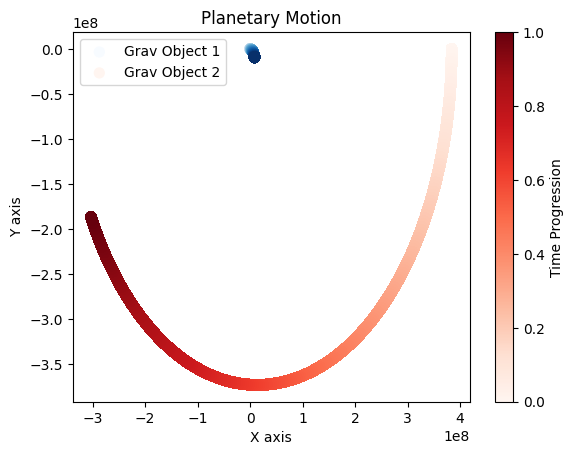

In [263]:
time1 = np.linspace(0, 1, int(percent*len(x1_pos)))
time2 = np.linspace(0, 1, int(percent*len(x2_pos)))

plt.scatter(x1_pos[0:set_max], y1_pos[0:set_max], c=time1, cmap='Blues', label='Grav Object 1', s=50)
plt.scatter(x2_pos[0:set_max], y2_pos[0:set_max], c=time2, cmap='Reds', label='Grav Object 2', s=50)

plt.colorbar(label='Time Progression')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Planetary Motion')
plt.legend()
plt.show()

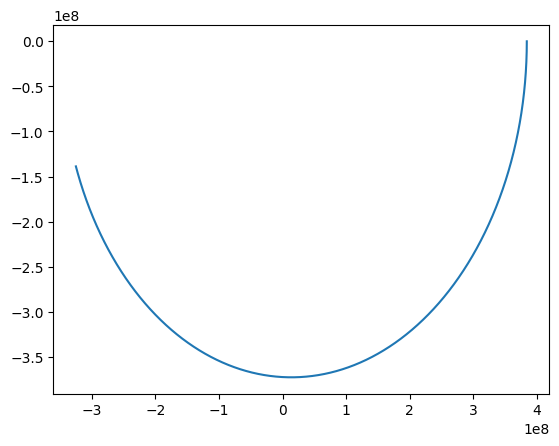

In [264]:
plt.plot(x2_pos, y2_pos)

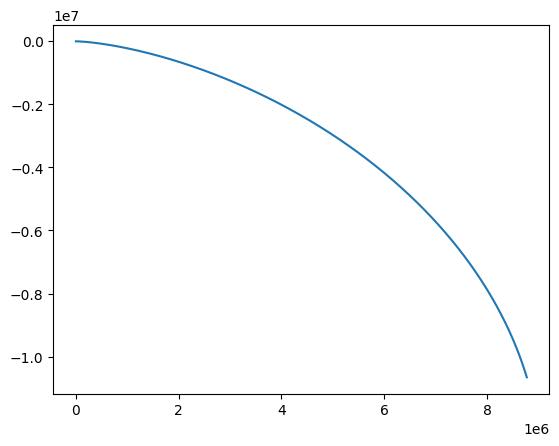

In [265]:
plt.plot(x1_pos, y1_pos)